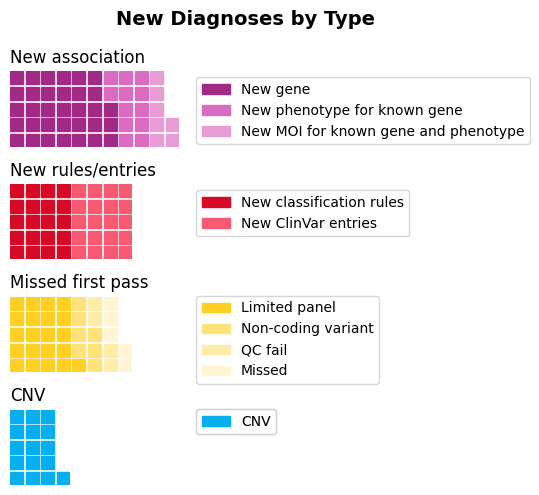

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
from pywaffle import Waffle

data_r = pd.read_csv('../../Data/Fig4/Fig4_panel2_Data01.csv', header=0, index_col=0)
data= data_r.T
solve_data = data.sum(axis='columns').to_dict()

colors_list = ['#a22986', 
        '#da6bc1',
        '#e79cd6',
        '#d70926',
        '#f85a71',
        '#ffcf21',
        '#ffe279',
        '#ffeca6', 
        '#fff5d2',
        '#06b0f0']

#print([f"{k} ({v})" for k, v in data['New association'].items()][0:3])

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        411: {
            'values': data['New association'],
            'title': {'label': 'New association', 'loc': 'left', 'fontsize': 12}
        },
        412: {
            'values': data['New rules/entries'],
            'title': {'label': 'New rules/entries', 'loc': 'left', 'fontsize': 12}
        },
        413: {
            'values': data['Missed first pass'],
            'title': {'label': 'Missed first pass', 'loc': 'left', 'fontsize': 12}
        },
        414: {
            'values': data['CNV'],
            'title': {'label': 'CNV', 'loc': 'left', 'fontsize': 12}
        },
    },
    rows=5,
    colors=colors_list,
    rounding_rule='ceil',
    figsize=(5, 5)
)

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

patches = []
for x in range(len(solve_data)):
    patches.append(mpatches.Patch(color=colors_list[x], label=list(solve_data.keys())[x]))
plt.legend(handles=patches, bbox_to_anchor=(3,2), loc="lower left")

legend1 = plt.legend(handles=patches[0:3], bbox_to_anchor=(3,5.5), loc="upper left")
legend2 = plt.legend(handles=patches[3:5], bbox_to_anchor=(3,4), loc="upper left")
legend3 = plt.legend(handles=patches[5:9], bbox_to_anchor=(3,2.6), loc="upper left")
legend4 = plt.legend(handles=patches[9:10], bbox_to_anchor=(3,1.1), loc="upper left")
fig.add_artist(legend1)
fig.add_artist(legend2)
fig.add_artist(legend3)
fig.add_artist(legend4)

fig.suptitle('New Diagnoses by Type', fontsize=14, fontweight='bold')
fig.savefig('../../Figures/Fig4/Fig4_panel2.png')